<h1>Text Classification Using Machine Learning Algorithm

In [1]:
import pandas as pd
import numpy as np
import re
from textblob import Word

import os

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

# to splite dataset into train and test data.
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# importing Machine learning Algorithm from sklearn
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.neighbors.nearest_centroid import NearestCentroid # Centroid Based Classifier
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.naive_bayes import BernoulliNB # Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier # Decission Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('mydatset.csv')

In [6]:
def clean_str(string):
    """
    Tokenization/string cleaning for datasets.
    """
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [7]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(data['type'])
data['type'] = labelEncoder.transform(data['type'])

In [8]:
for index,value in enumerate(data['news']):
    # print "processing data:",index
    data['news'][index] = ' '.join([Word(word).lemmatize() for word in clean_str(value).split()])


C:\Users\Lukram Boy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
vect = TfidfVectorizer(stop_words='english',min_df=2)
feature = vect.fit_transform(data["news"])

In [10]:
label = data["type"]
# Suffle data to increase accuracy
label, feature = shuffle(label, feature, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.20, random_state=0)


In [13]:
# # Now train the model
linearRegr = LinearRegression().fit(x_train, y_train)
logisticRegr = LogisticRegression().fit(x_train, y_train)
model_centroid = NearestCentroid().fit(x_train, y_train)
model_knn = KNeighborsClassifier(28).fit(x_train, y_train)
model_svm = SVC().fit(x_train, y_train)
model_nb = BernoulliNB().fit(x_train, y_train)
model_dtree = DecisionTreeClassifier(criterion = "entropy",
 random_state = 100, max_depth=3, min_samples_leaf=5).fit(x_train, y_train)
model_rfc = RandomForestClassifier(n_estimators=300, max_depth=150,n_jobs=1).fit(x_train, y_train)

In [14]:
 # Find the accuracy of each model
phrase = "The accuracy of %s is %0.2f"
accu_lir = linearRegr.score(x_test, y_test)
print(phrase % ("Linear Regression", 100*accu_lir))
accu_lr = logisticRegr.score(x_test, y_test)
print(phrase % ("Logistic Regression", 100*accu_lr))
accu_centroid = model_centroid.score(x_test, y_test)
print(phrase % ("Centroid Based Classifier", 100*accu_centroid))
accu_knn = model_knn.score(x_test, y_test)
print(phrase % ("KNN", 100*accu_knn))
accu_svm = model_svm.score(x_test, y_test)
print(phrase % ("SVM", 100*accu_svm))
accu_nb = model_nb.score(x_test, y_test)
print(phrase % ("Naive Bayes", 100*accu_nb))
accu_dtree = model_dtree.score(x_test, y_test)
print(phrase % ("Decission Tree", 100*accu_dtree))
accu_rfc = model_rfc.score(x_test, y_test)
print(phrase % ("RandomForest Classifier", 100*accu_rfc))
y_pred = model_centroid.predict(x_test)


The accuracy of Linear Regression is 85.82
The accuracy of Logistic Regression is 97.53
The accuracy of Centroid Based Classifier is 96.40
The accuracy of KNN is 94.38
The accuracy of SVM is 21.35
The accuracy of Naive Bayes is 96.40
The accuracy of Decission Tree is 56.63
The accuracy of RandomForest Classifier is 95.96


In [16]:
# PERFORMANCE OF DIFFERENT MODELS USING CROSS VALIDATION 
scoring_list = {'ac': 'accuracy', 'pc' : 'precision_macro', 're': 'recall_macro', 'f1': 'f1_macro'}

In [17]:
print("(1) LOGISTIC REGRESSION -------------->")
scores_lor = cross_validate(logisticRegr, feature, label, cv=5, scoring = scoring_list)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lor['test_ac'].mean(), scores_lor['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_lor['test_pc'].mean(), scores_lor['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_lor['test_re'].mean(), scores_lor['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_lor['test_f1'].mean(), scores_lor['test_f1'].std() * 2))


(1) LOGISTIC REGRESSION -------------->
Accuracy: 0.97 (+/- 0.01)
Precision: 0.97 (+/- 0.01)
Recall: 0.97 (+/- 0.01)
F1: 0.97 (+/- 0.01)


In [18]:
print("\n(2) CENTROID BASED CLASSIFIER -------------->")
scores_nc = cross_validate(model_centroid, feature, label, scoring = scoring_list, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_nc['test_ac'].mean(), scores_nc['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_nc['test_pc'].mean(), scores_nc['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_nc['test_re'].mean(), scores_nc['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_nc['test_f1'].mean(), scores_nc['test_f1'].std() * 2))



(2) CENTROID BASED CLASSIFIER -------------->
Accuracy: 0.96 (+/- 0.01)
Precision: 0.96 (+/- 0.01)
Recall: 0.96 (+/- 0.01)
F1: 0.96 (+/- 0.01)


In [19]:
print("\n(3) K-NN CLASSIFIER -------------->")
scores_knn = cross_validate(model_centroid, feature, label, scoring = scoring_list, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn['test_ac'].mean(), scores_knn['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_knn['test_pc'].mean(), scores_knn['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_knn['test_re'].mean(), scores_knn['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_knn['test_f1'].mean(), scores_knn['test_f1'].std() * 2))


(3) K-NN CLASSIFIER -------------->
Accuracy: 0.96 (+/- 0.01)
Precision: 0.96 (+/- 0.01)
Recall: 0.96 (+/- 0.01)
F1: 0.96 (+/- 0.01)


In [20]:
print("\n(4) SVM -------------->")
scores_sv = cross_validate(model_svm, feature, label, scoring = scoring_list, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_sv['test_ac'].mean(), scores_sv['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_sv['test_pc'].mean(), scores_sv['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_sv['test_re'].mean(), scores_sv['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_sv['test_f1'].mean(), scores_sv['test_f1'].std() * 2))


(4) SVM -------------->


C:\Users\Lukram Boy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lukram Boy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lukram Boy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lukram Boy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lukram Boy\Anaconda3\lib\si

Accuracy: 0.27 (+/- 0.18)
Precision: 0.08 (+/- 0.13)
Recall: 0.24 (+/- 0.16)
F1: 0.11 (+/- 0.15)


C:\Users\Lukram Boy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
print("\n(5) NAIVE BAYES -------------->")
scores_nb = cross_validate(model_nb, feature, label, scoring = scoring_list, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_nb['test_ac'].mean(), scores_nb['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_nb['test_pc'].mean(), scores_nb['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_nb['test_re'].mean(), scores_nb['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_nb['test_f1'].mean(), scores_nb['test_f1'].std() * 2))


(5) NAIVE BAYES -------------->
Accuracy: 0.96 (+/- 0.01)
Precision: 0.96 (+/- 0.01)
Recall: 0.95 (+/- 0.01)
F1: 0.96 (+/- 0.01)


In [22]:
print("\n(6) DECISION TREE -------------->")
scores_dt = cross_validate(model_dtree, feature, label, scoring = scoring_list, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dt['test_ac'].mean(), scores_dt['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_dt['test_pc'].mean(), scores_dt['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_dt['test_re'].mean(), scores_dt['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_dt['test_f1'].mean(), scores_dt['test_f1'].std() * 2))


(6) DECISION TREE -------------->
Accuracy: 0.54 (+/- 0.04)
Precision: 0.70 (+/- 0.11)
Recall: 0.53 (+/- 0.03)
F1: 0.52 (+/- 0.05)


In [23]:
print("\n(7) RAMDOM FOREST -------------->")
scores_rf = cross_validate(model_rfc, feature, label, scoring = scoring_list, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf['test_ac'].mean(), scores_rf['test_ac'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores_rf['test_pc'].mean(), scores_rf['test_pc'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores_rf['test_re'].mean(), scores_rf['test_re'].std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (scores_rf['test_f1'].mean(), scores_rf['test_f1'].std() * 2))



(7) RAMDOM FOREST -------------->
Accuracy: 0.96 (+/- 0.01)
Precision: 0.97 (+/- 0.01)
Recall: 0.96 (+/- 0.01)
F1: 0.96 (+/- 0.01)


k value with best accuracy is  [17]


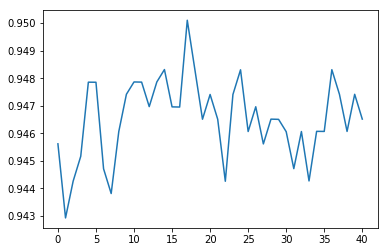

In [24]:
#CROSS VALIDATION AND FINDING BEST K VALUE OF KNN
k_scores = []
for i in range(10,51):
    kn = KNeighborsClassifier(i)
    scores =cross_val_score(kn, feature, label, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print("k value with best accuracy is ", np.where(np.array(k_scores) == np.array(k_scores).max())[0])

plt.plot(k_scores)
plt.show()

In [25]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    return fig 


In [26]:
cm = confusion_matrix(y_test,y_pred)

Method 1 (Seaborn)


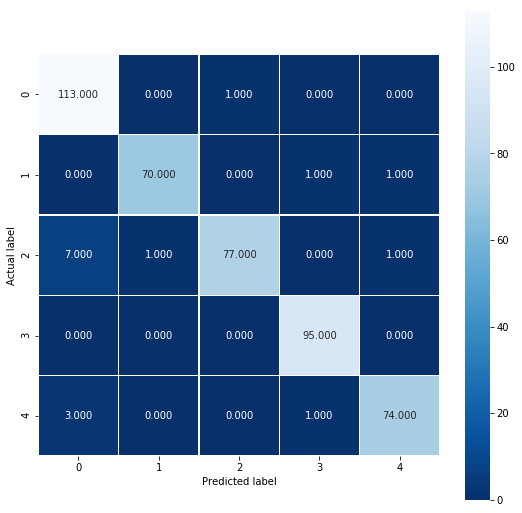

In [27]:
print("Method 1 (Seaborn)")
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

In [28]:
def predictNews(news_article):
	tf_idf_news = vect.transform([news_article])
	# print (tf_idf_news)
	print("The given news type is ",logisticRegr.predict(tf_idf_news))

In [29]:
article = """Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (?600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.

Time Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. "Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility," chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.

TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake."""


In [30]:
predictNews(article)

The given news type is  [0]
